Grabbing RotF Data from this pc, starting with basic imports.
Using csv to parse the massive text files we make from the rotf discord bot channels.
oprator is used to help clean and sort data for alternative specified uses.

In [19]:
import csv

We use these 2 functions to clean the data we get from the rotf discord channel. Here is an example of what a line looks like from the csv.

['deaths', '2019-07-18 21:16:42.498000', '<@&542343490600828930> : Pekson (6/8, 868) has been crushed by Thusala!']\

upon splitting this single line we get a very disgusting split on the main text that we want so we have to clean up each player, bossname, date and base fame. Basefame from the discord channel is the your base fame and not your actual death fame, using a bracketed system we've made a crude estimate of each death (Feel tree to tweak these numbers as you see fit.)


In [20]:
def loot_data():
    with open('Loot.txt', 'r') as file:
        items = {} #Used to filter and find names for item blacklist
        
        newFile = open('pandas_loot.txt', 'w')
        
        newFile.write('player;item;type;date\n')
        
        blacklist = ['mike', 'miniguy', 'miniguy', 'skilly', 'tuckingfypo', 'blanks', 'lootaveli', 'kyooooh', 'letgay',
                     'freakbaby', 'byrooni', 'freeprem', 'darazakel', 'swan', 'chao', 'thotiana', 'kouhai', 'sendhelp',
                     'weebster', 'son', 'calena', 'fleaf', 'loganalt', 'mike', 'skilly', 'lilgary', 'myra', 'kotvkedax',
                     'zee', 'keep', 'shinx']


        item_blacklist = ['pls video ;(((', 'pls video ;(((', 'autism', 'u aint gettin one', 'Depression',
                          'hah u thought', 'YOINKED UR 10K FAME - ARENA', 'gay', 'Dead Streamer', 'Gay', '0 0 0',
                          'A can of whoopass made for the hand.', 'yOU SMELL THIS TO0???', 'depression',
                          'Streetwise dumb bruh, but booksmart.', 'Fioreen said to', 'bruhmoment', 'Lol get rekt mate',
                          'Canhannon', 'LOL', 'looooooOOOOOOOOOOoooooooL', 'never getting a hc legit btw', '1',
                          'Hvis pose', 'Hentai', 'Short Dagger', 'breastplate of the big titan',
                          'Followers for Depression', 'u wish', 'Admin Sword', 'Omni Ring', 'oWocannon', ':)I',
                          'handcannon', 'LOOOOOOL', 'Omnipotence Ring', 'u like getting loot', 'Public Arena Key',
                          '64 Stacks of Cobblestone', ':)', 'this guy has 100% death ratio', 'this guy has swagger',
                          'U GOT IT AGAIN GROSS BOW', 'GROSS BOW!!!', 'Shattered Waraxe', 'Lucky Potio',
                          'he got hand & feet too', 'head', 'Lol you wish this was an Asura', 'MONEY MOVES!!!',
                          'Handcannon', "Tiive's Banhammer", "The Banhammer",'no',"Thusula's Slasher"]

        loots = csv.reader(file, delimiter=' ', quoting=csv.QUOTE_NONE)
        for eachDrop in loots:
            if len(eachDrop) > 5:
                # Get Date
                date = eachDrop[1][1:]

                # Get Player name
                user = eachDrop[5][1:-1]
                user = user.lower()
                # Get Drop Type (Pimal/Lege) 200 tokens check
                drop_type = eachDrop[9]
                # primal=Primal, legendary=Legendary, Necrotic = 200 necrop tokens.

                # Get item name
                item_name = eachDrop[11:]
                final_item = ''
                for eachIndex in item_name:

                    if eachIndex[len(eachIndex)-1] == ']':
                        final_item += eachIndex
                        final_item = final_item[1:-1]
                        break
                    else:
                        final_item += eachIndex + ' '

                if drop_type == 'primal' and final_item not in item_blacklist and user not in blacklist:
                    # Collect item
                    if final_item not in items and final_item not in item_blacklist:
                        
                        newFile.write(user + ';' + final_item + ";" + drop_type + ';' + date + '\n')
                    elif final_item in items and final_item not in item_blacklist:
                        newFile.write(user + ';' + final_item + ";" + drop_type + ';' + date + '\n')

                elif drop_type == 'legendary' and final_item not in item_blacklist and user not in blacklist:
                    #Item name collection
                    if final_item not in items and final_item not in item_blacklist:   
                        newFile.write(user+';'+final_item+";"+drop_type+';'+date+'\n')
                    elif final_item in items and final_item not in item_blacklist:
                        newFile.write(user+';'+final_item+";"+drop_type+';'+date+'\n')
                    # Total lege addition

                elif drop_type == 'Necrotic' and user not in blacklist:
                    # Total Token addition
                   
                    if drop_type =='Necrotic':
                        # Extra work to grab token names
                        token_item = final_item.split()
                        final_item = ''
                        for eachIndex in token_item[2:]:
                            if ']' in eachIndex:
                                final_item += eachIndex
                                final_item = final_item[1:-3]
                                #print(user, final_item, drop_type, date) working 100%
                                newFile.write(user+';'+final_item+";"+drop_type+';'+date+'\n')
                                break
                            else:
                                final_item += eachIndex + ' '
           
        newFile.close()
        return 'Completed, filename = pandas_loot.txt'
        
        

def death_data():
    with open('Death.txt', 'r') as DeathFile:

        blacklist = ['mike', 'miniguy', 'miniguy', 'skilly', 'tuckingfypo', 'blanks', 'lootaveli', 'kyooooh', 'letgay',
                     'freakbaby', 'byrooni', 'freeprem', 'darazakel', 'swan', 'chao', 'thotiana', 'kouhai', 'sendhelp',
                     'weebster', 'son', 'calena', 'fleaf', 'loganalt', 'mike', 'skilly', 'lilgary', 'myra', 'kotvkedax',
                     'zee', 'keep', 'lilpredato','nexuscrier','itscubic','vagrant','']

        newFile = open('pandas_death.txt', 'w')
        newFile.write('player;basefame;monster;date\n')

        deaths = csv.reader(DeathFile, delimiter=' ', quoting=csv.QUOTE_NONE)
        for eachDeath in deaths:

            if len(eachDeath) > 4 and eachDeath[3] != "'@Deaths:":

                date = eachDeath[1][1:]
                death = eachDeath[5:]
                player = death[0]
                player = player.lower()
                max_deaths = death[1][1:-1]
                #
                monster = death[7:]
                if monster[0] == 'Epic':
                    monster = monster[1:]

                monster = ' '.join(monster)[:-3]
                basefame = int(death[2][:-1])

                # Collect Player that died and their fame gained
                if player not in blacklist:
                    if basefame > 0 and basefame <= 450:
                        newFile.write(player + ';' + str(basefame*1) + ';' + monster + ';' + date + '\n')
                    elif basefame > 450 and basefame <= 1000:
                        newFile.write(player + ';' + str(basefame*1.5) + ';' + monster + ';' + date + '\n')
                    elif basefame > 1000 and basefame <= 3500:
                        newFile.write(player + ';' + str(basefame*2) + ';' + monster + ';' + date + '\n')
                    elif basefame > 3500 and basefame <= 5000:
                        newFile.write(player + ';' + str(basefame*2.5) + ';' + monster + ';' + date + '\n')
                    elif basefame > 5000 and basefame <= 7500:
                        newFile.write(player + ';' + str(basefame*3.5) + ';' + monster + ';' + date + '\n')
                    elif basefame > 7500 and basefame <= 9000:
                        newFile.write(player + ';' + str(basefame*4) + ';' + monster + ';' + date + '\n')
                    elif basefame > 9000 and basefame <= 9999:
                        newFile.write(player + ';' + str(basefame*4.5) + ';' + monster + ';' + date + '\n')
                    elif basefame >= 10000 and basefame <= 10500:
                        newFile.write(player + ';' + str(basefame*7) + ';' + monster + ';' + date + '\n')
                    elif basefame > 10500 and basefame <= 12500:
                        newFile.write(player + ';' + str(basefame*5.5) + ';' + monster + ';' + date + '\n')
                    elif basefame > 12500 and basefame <= 15000:
                        newFile.write(player + ';' + str(basefame*5.75) + ';' + monster + ';' + date + '\n')
                    elif basefame > 15000 and basefame <= 29999:
                        newFile.write(player + ';' + str(basefame*6) + ';' + monster + ';' + date + '\n')
                    elif basefame > 29999 and basefame <= 31000:
                        newFile.write(player + ';' + str(basefame*6.5) + ';' + monster + ';' + date + '\n')
                    elif basefame > 31000 and basefame <= 99999:
                        newFile.write(player + ';' + str(basefame*10) + ';' + monster + ';' + date + '\n')
                    elif basefame > 99999:
                        newFile.write(player + ';' + str(basefame*15) + ';' + monster + ';' + date + '\n')

        newFile.close()
        return 'Completed, filename = pandas_death.txt'
print("Give this part one moment, its cleaning every single death and loot drop from the discord channel.\nYou will see two 'Completed' messages below this and this block is considered finished.")
print(loot_data())
print(death_data())

Give this part one moment, its cleaning every single death and loot drop from the discord channel.
You will see two 'Completed' messages below this and this block is considered finished.
Completed, filename = pandas_loot.txt
Completed, filename = pandas_death.txt



Nice The most confusing part is complete; Now we can actually begin exploring the data we've collected using 2 new libraries. Pandas and Seaborn, we'll use pandas to easily deal with our new text files as data frames and seaborn to better understand our data through visualization(graphs)

In [21]:
# Each Import has that as there so that we don't have to write out pandas and seaborn when actively using each library.
import pandas as pd
import seaborn as sns

Awesome, let's get a quick run down of what our data looks like from both the pandas_loot and pandas_death text files using pandas, When using the head() function from pandas it will print the first 5 rows of each dataframe, we can also grab a summary of each Data frame and look to see if anything interesting shows up immediately.

In [23]:
# Although we are using txt files we can still read it as a csv if we include a delimiter in our case ;
# Every column of data in each line of our text files was seperated with a ';' 
loot_df = pd.read_csv('pandas_loot.txt', sep=';')

death_df = pd.read_csv('pandas_death.txt', sep=';')

print("Checking top 5 rows from Loots")
print(loot_df.head())

print("\n\nChecking Top 5 rows from Deaths")
print(death_df.head())

Checking top 5 rows from Loots
     player                item    type        date
0     krtel      Orb of Destiny  primal  2019-07-18
1  winybaby   Claw of the Beast  primal  2019-07-18
2    annual  Bone Splinter Robe  primal  2019-07-18
3   xproxod       Lycaon's Hide  primal  2019-07-18
4   xproxod        Wand of Bone  primal  2019-07-18


Checking Top 5 rows from Deaths
       player  basefame       monster        date
0  mooonlight    1425.0  Spoilt Flesh  2019-07-18
1      pekson    1302.0       Thusala  2019-07-18
2    survivor     316.0       Thusala  2019-07-18
3  angelicpup    1288.5         Feral  2019-07-18
4    thiccbic     316.0         Feral  2019-07-18


From this we can see our 4 column names for each Dataframe, Loots uses players, item, type and date. Deaths uses player, basefame, monster and date. This data is currently not sorted in any way it simple shows the first 5 lines of each text file the pandas dataframe was created from.

Lets go a bit deeper with pandas function describe()


In [25]:
print("Using .describe on Loots DF\n")
print(loot_df.describe())

print("\n\nUsing .describe on Deaths DF\n")
print(death_df.describe())

Using .describe on Loots DF

         player                      item       type        date
count     54226                     54226      54226       54226
unique    10864                       151          3         159
top     ehoniii  Cloak of the Planewalker  legendary  2019-06-16
freq        291                      4724      49753         802


Using .describe on Deaths DF

           basefame
count  1.957090e+05
mean   2.187411e+03
std    1.866197e+04
min    1.000000e+00
25%    2.670000e+02
50%    8.985000e+02
75%    2.166000e+03
max    4.096125e+06


Lets start with Deaths here as its the simpler one to explain (ironic). Here you see it only shows one column basefame, thats because all of the other columns were all string type data pieces, Pandas will always work around one datatype for a dataset unless specified directly, in this example basefame is type float, so pandas prioritizes that and ends up with some massive numbers due to how its grabbing the sum of the basefame column. Quick spoilter there is well over 400 million fame from deaths alone on the server right now just from the data we get from this discord channel.

<br>
<span style="color:red"><span style="font-family:Courier; font-size:x-large;">--Count--</span></span>

Count from each column is expectedly equal, there are 54,232 total drops logged on that bot that are legendary or primal and not absolute trolls by mike, we blacklisted a wonky amount of items and a couple of players that mike tends to troll drop most often to try and deal with those issues.

<br>
<span style="color:red"><span style="font-family:Courier; font-size:x-large;">--Unique--</span></span>
                                                 
    
Out of the 54,232 drops 10,864 players have dropped them all meaning that in an ideal world each player is dropping a mix of 5 lege/primal/tokens. 

There are 154 unique items and 3 unique types Legendary, Primal or the 200 Necropolis Tokens turn in.

There are 159 total unique days of data from the discord channel.

<br>
<span style="color:red"><span style="font-family:Courier; font-size:x-large;">--Top--</span></span>
                                            
Top is going to seem obvious as well, Pandas doesn't hide behind much confusing and obfuscation with the information it projects. 

ehoniii has the most overall entries in the players column  meaning he may have the most drops if we include all legendaries, primals and token turn ins. 

The most common item is the planewalker, likely due to sprites mega spam for easy money starting off. 

The most common type is Legendary, expectedly; primals only dropped from one dungeon until the yeti boy came around. 

6/16/2019 is the day with the most logged drops of them all, this was on a sunday dat 25% boost :^)

<br>
<span style="color:red"><span style="font-family:Courier; font-size:x-large;">--Freq--</span></span>

FREQ is short for FREQUENCY, this line gives us a bit more information on the "TOP" row

Player "ehoniii" has dropped 291 notable times. <br><br>
There have been 4724 Planewalker drops. <br> <br>
Out of the 54,232 logged drops 49,753 of them are Legendary <br> <br>
on 6/16/2019 802 Notable items dropped. 
<br>
Lets look at that last part a bit more, out of 159 total days if 54,232 drops were evenly split you would have Approximately
<br>

342(rounded up) drops per unique day This Sunday doubled the average amount and then some. a near 200% Average drop of items.


It's nice to break the data down like this. it becomes much easier to find interesting anomalies of sorts

I want to look into the Deaths dataframe a bit more as it returned nothing insightful to us.


In [26]:
print("Getting the sum of all deaths logged\n")
print("{:,}".format(round(death_df.basefame.sum())) +'Total fame\n')

print("Getting the top 5 deaths\n")
sorted_basefame = death_df.sort_values('basefame', ascending=False)
print(sorted_basefame.head())

print("\nGetting the top 5 monster killers\n")
monster = death_df.monster.value_counts()
print(monster.head())



Getting the sum of all deaths logged

428,095,947.0Total fame

Getting the top 5 deaths

         player   basefame               monster        date
8520    wealthy  4096125.0             Queen Bee  2019-07-11
23466    mrduck  3381045.0              Skeleton  2019-06-28
69516    xdannx  2536530.0                Medusa  2019-05-07
43907   impooop  2522295.0                Anubis  2019-06-06
174750   eziiio  1851840.0  Limon the Sprite God  2019-02-26

Getting the top 5 monster killers

Angry Yeti             8042
Zucc                   7965
TStonetaker Boulder    7601
Ortar                  7387
Mysterious Card        7016
Name: monster, dtype: int64


From here we can see that there is approximately </span></span> <span style="color:red"><span style="font-family:Courier; font-size:x-large;"> 428 million fame</span></span> has entered the game since the start of this rotf discord bot. 

The top 5 deaths are ones from the legends leaderboard expectedly. Astonishingly in the top 5 monsters the<span style="color:red"><span style="font-family:Courier; font-size:x-large;"> Angry Yeti </span></span> has surpassed all of the other monsters and he was released much later into the rotf notifier bot's existence! Actual hard content? :O

</span></span> <span style="color:green"><span style="font-family:Courier; font-size:x-large;"> Let's look back at the loots  Dataframe a bit more and prioritize Date column</span></span>


In [27]:
print("Getting Dates information from Loots_DF")
dates = loot_df.date.value_counts()
print(dates.head())

Getting Dates information from Loots_DF
2019-06-16    802
2019-03-24    689
2019-07-14    684
2019-06-30    664
2019-03-31    640
Name: date, dtype: int64


That is very interesting the top 5 total drops days are ALL Sundays. The 25% Loot boost almsot certainly plays a role in that, however it may be more about getting MORE players online to play actively inflating the drops per day as well. I do wonder what happened on 6/16/2019 to make it stand out so much more than the rest.

In [28]:
print("Checking one date")
selected_date = loot_df.loc[loot_df['date'] == '2019-06-16']
print(selected_date.describe())

Checking one date
        player               item       type        date
count      802                802        802         802
unique     549                102          3           1
top     baxter  Shattered War Axe  legendary  2019-06-16
freq         9                 78        750         802


Player named baxter got 9 drops <br> 78 of the drops this day were Shattered War Axes.
<br>750 of the 802 drops were legendary <br>802 drops are split between 549 players and 102 different items drop, this number might be slightly slower since we seperated the primal tokens from the primal drops.<br> Lets dig deeper.


In [29]:
item_drops = selected_date.item.value_counts()
print("Top 5 dropped items")
print(item_drops.head())
print('\n\n')

print("Top 5 players (drop count)")
player_counts = selected_date.player.value_counts()
print(player_counts.head())

Top 5 dropped items
Shattered War Axe             78
Helm of the Juggernaut        58
Shield of Ogmur               48
Dagger of the Endless Void    47
Crystal Wand                  38
Name: item, dtype: int64



Top 5 players (drop count)
baxter       9
ehoniii      8
mrduck       7
aurorious    6
jaemincho    6
Name: player, dtype: int64


This appears to be just another day; showing the top 10 players and dropped items we see nothing abnormal about this, our item and player blacklists are working as intended. This means that this sunday above all others was just a very lucky sunday or there were many staff events that would inflate the drop counter substantially (This would take some effort).
<br>
<center><span style="color:green"><span style="font-family:Courier; font-size:x-large;"> Let's get more Visual</span></span></center>




Using the player counts we can get a better understanding on player 'luck'


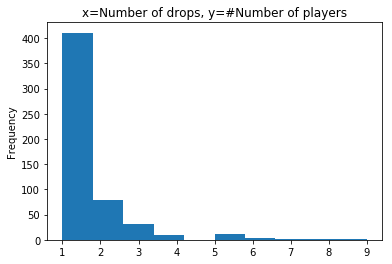

In [30]:
print("Using the player counts we can get a better understanding on player 'luck'")
player_counts.plot.hist(title='x=Number of drops, y=#Number of players')

While there is a notion from the playerbase that they are "unlucky" for not getting more drops the reality is that 98% of the playerbase coasts at around 1-3 drops, 1 drop being the bulk of the playerbase. and this is on the LUCKIEST day we have logged so far. You are not unlucky that player is likely EXTREMELY lucky or more realistically they are actively killing valuable monsters much more frequently than you are in a given time span. <br><br><br>

<center><span style="color:green"><span style="font-family:Courier; font-size:x-large;">Let's Look at primal drops</span></span></center>

In [31]:
selected_type = loot_df.loc[loot_df['type'] == 'primal']
selected_type_tokens = loot_df.loc[loot_df['type']=='Necrotic']
combined = pd.merge(selected_type, selected_type_tokens, how='outer')

print(combined.head())
print('\n',combined.describe())

     player                item    type        date
0     krtel      Orb of Destiny  primal  2019-07-18
1  winybaby   Claw of the Beast  primal  2019-07-18
2    annual  Bone Splinter Robe  primal  2019-07-18
3   xproxod       Lycaon's Hide  primal  2019-07-18
4   xproxod        Wand of Bone  primal  2019-07-18

             player            item    type        date
count         4473            4473    4473        4473
unique         982              35       2         156
top     cocknibble  Orb of Destiny  primal  2019-06-30
freq            69             206    4018         105


Showing just primals Cocknibble is insane with 69 primal drops, the most common primal the "Orb of Destiny".
A very interesting thing to noticed here is that the 4,479 total drops are dropped by just 982 players, A massive increase
to the average notable drop count we saw erlier at just 1 per player, this is where the good players dwell. time for a better visual, lets see if there are larger discrepencies.

cocknibble    69
sniperb       49
paluuu        44
uta           43
femboy        40
Name: player, dtype: int64


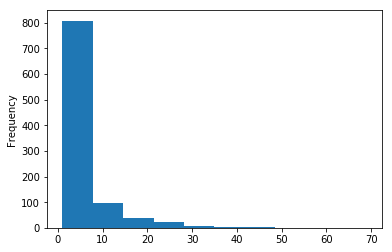

In [32]:
player_counts = combined.player.value_counts()
print(player_counts.head())
player_counts.plot.hist()

I used the df.head function to show the top 5 players as far as dropped primals goes and then tossed all players onto a histogram as we can see yet again, playes are not "unlucky" they are simply skewed by seeing some of the more avid and non time-gated players go ham. Let's look at specific items.

Orb of Destiny           206
The Twilight Grimoire    198
Necklace of Fangs        193
Lycaon's Hide            192
Elithor's Soul Bottle    189
Name: item, dtype: int64


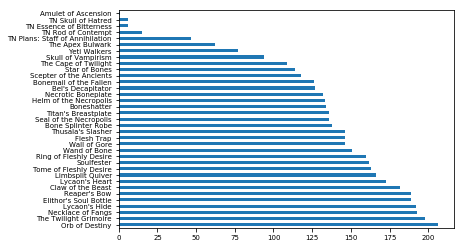

In [33]:
item_counts= combined.item.value_counts()
print(item_counts.head())



item_counts.plot.barh(fontsize=7)
